In [1]:
import matplotlib.pyplot as plt
import numpy as np
import MDAnalysis as mda
from MDAnalysis.analysis.msd import EinsteinMSD
from matplotlib.backends.backend_pdf import PdfPages

/ext3/miniconda3/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
universe = mda.Universe('../Setup/HPC/water_NaCl/gromacs/step5_10.gro','../Setup/HPC/water_NaCl/gromacs/water_center.xtc')
oxygen_atoms = universe.select_atoms('name OH2')  # Adjust selection depending on naming convention in your trajectory
sodium = universe.select_atoms('name SOD')  # adjust atom name if different
chloride  = universe.select_atoms('name CLA')

msd_water_oxygens = EinsteinMSD(oxygen_atoms,msd_type='xyz',fft=True).run()
msd_sodium = EinsteinMSD(sodium,msd_type='xyz',fft=True).run()
msd_chloride = EinsteinMSD(chloride,msd_type='xyz',fft=True).run()

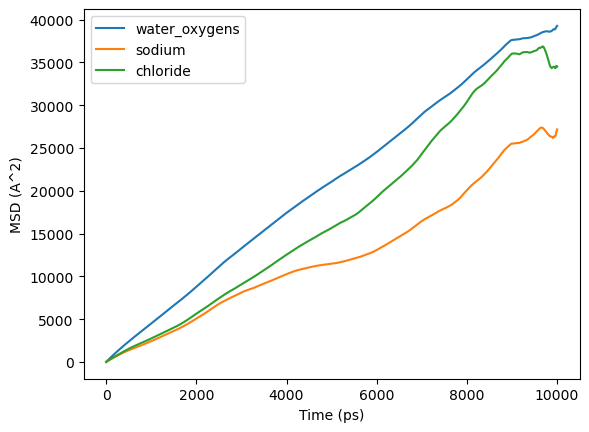

In [17]:
fig=plt.figure()

plt.plot(msd_water_oxygens.times,msd_water_oxygens.results.timeseries,label='water_oxygens')
plt.plot(msd_sodium.times,msd_sodium.results.timeseries,label='sodium')
plt.plot(msd_chloride.times,msd_chloride.results.timeseries,label='chloride')
plt.xlabel('Time (ps)')
plt.ylabel('MSD (A^2)')
plt.legend()

pdf_file=PdfPages('../Figures/Week4_water_figures.pdf')
pdf_file.savefig()
pdf_file.close()